# 1. BUSINESS UNDERSTANDING

## 1.1 BUSINESS OVERVIEW

SyriaTel is a phone and internet company. Its income mainly comes from customers who keep paying for their service every month. Getting new customers is expensive, so it is usually cheaper and more profitable to keep the customers they already have.

## 1.2 PROBLEM STATEMENT

SyriaTel loses some customers every month when they move to other providers. This loss, reduces the revenue and forces the company to spend more money on advertising and promotions to replace lost customers. Attracting new users is important, but it costs much more than keeping existing ones. Without knowing which customers are likely to leave, SyriaTel cannot act early to keep them. A clear way to predict company losses is need for the company to take action, reduce losses, and focus more on growing its customer base.

## 1.3 BUSINESS OBJECTIVES

### 1.3.1 MAIN OBJECTIVES

Find out which SyriaTel customers might leave soon and to Build a simple model to predict this which will help the company keep those customers and save money.

### 1.3.2 SPECIFIC OBJECTIVES

1. To identify patterns in customer data that indicate a higher chance of churn.

2. To determine the main factors that cause customers to leave SyriaTel.

3. To help the company reduce costs of acquiring new customers by keeping existing ones longer.

4. To support business growth by improving customer satisfaction and loyalty.

5. To give SyriaTel useful insights for creating retention strategies such as offers, discounts, or improved customer service.


### 1.3.3 RESEARCH QUESTIONS

1. Which customers are most likely to leave?

2. Can we predict churn before it happens?

3. What actions can SyriaTel take to keep them?

4. How does lower churn help revenue grow?

## 1.4 SUCCESS CRITERIA

To sucesfully build a model that predicts churn reliablywe need to identify the main reasons why customers leave which will help SyriaTel reduce churn and save revenue.

# 2.0 DATA UNDERSTANDING


- The data was gotten from Kaggle. (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset
- It contains 21 columns and 3333 rows.
- The dataset consists of float, integer, boolean and object data types.
- The dataset contains information on customer usage behavior, account details, service plans, and whether they churned or not.
- The column names are:
   1. **State**                  
   2. **Account length**                        
   3. **Area code**      
   4. **Phone number**         
   5. **International plan**     
   6. **Voice mail plan**       
   7. **Number vmail messages**   
   8. **Total day minutes**      
   9. **Total day calls**        
   10. **Total day charge**     
   11. **Total eve minutes**
   12. **Total eve  calls**
   13. **Total eve charge**      
   14. **Total night minutes**     
   15. **Total night calls**   
   16. **Total night charge**     
   17. **Total intl minutes**   
   18. **Total intl calls**    
   19. **Total intl charge**     
   20. **Customer service calls**
   21. **Churn**           

### Summary Statistics

In [40]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
#Load dataset
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [10]:
#general info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [11]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [12]:
# Summary statistics
print(df.describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [13]:
#check for missing values
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [14]:
#cheaking for duplicates
df.duplicated().sum()

0

In [15]:
# Make all column names lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [16]:
cat_cols = df.select_dtypes(include="object").columns
print("Categorical columns:", cat_cols.tolist())

Categorical columns: ['state', 'phone_number', 'international_plan', 'voice_mail_plan']


In [17]:
# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
print(df.groupby("churn")[["total_day_minutes", "total_day_calls", "total_day_charge"]].mean())


       total_day_minutes  total_day_calls  total_day_charge
churn                                                      
False         175.175754       100.283158         29.780421
True          206.914079       101.335404         35.175921


### Visualization

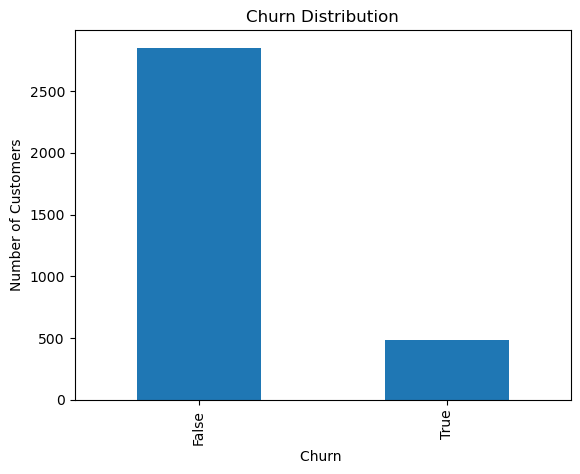

In [19]:
#how many customers stayed and how many left
df["churn"].value_counts().plot(kind="bar")

plt.title("Churn Distribution")
plt.xlabel("Churn ")
plt.ylabel("Number of Customers")
plt.show()

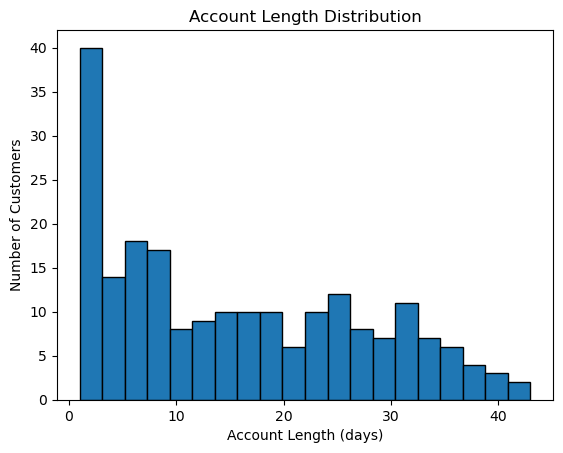

In [41]:
#histogram of the length of the period customers stayed
df["account_length"].value_counts().plot(kind="hist", edgecolor="black", bins=20)

plt.title("Account Length Distribution")
plt.xlabel("Account Length (days)")
plt.ylabel("Number of Customers")
plt.show()

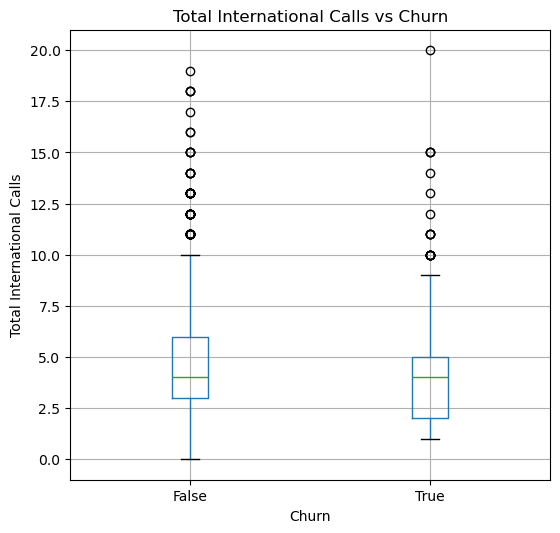

In [85]:
#It compares to show among those who stayed or those who left which group makes more or fewer international calls
df.boxplot(column="total_intl_calls", by="churn", figsize=(6,6))

plt.title("Total International Calls vs Churn")
plt.suptitle("") 
plt.xlabel("Churn")
plt.ylabel("Total International Calls")
plt.show()


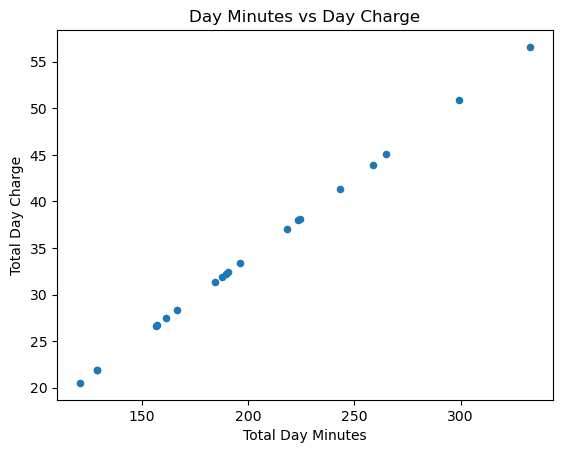

In [43]:
#how much income was made per minute
df.head(20).plot(kind="scatter", x="total_day_minutes", y="total_day_charge")

plt.title("Day Minutes vs Day Charge")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.show()


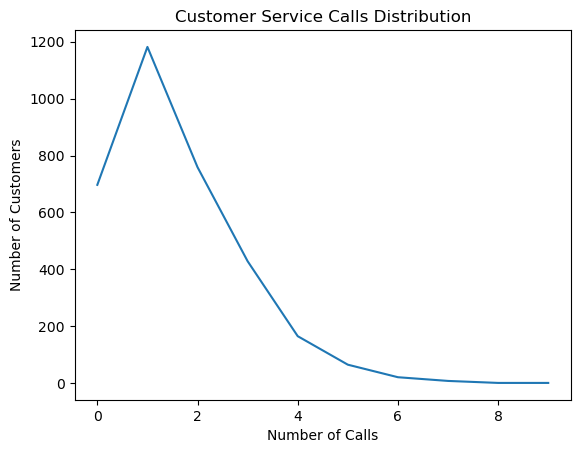

In [45]:
#To know how many customers are unhappy with the service and are more likely to leave
df["customer_service_calls"].value_counts().sort_index().plot(kind="line")

plt.title("Customer Service Calls Distribution")
plt.xlabel("Number of Calls")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
#class imbalance
df["churn"].value_counts(normalize=True)


### Train-Test Split

In [22]:
#Features (X) and Target (y) 
#(X)all customer details except churn
#(y)whether customer churned
X = df.drop("churn", axis=1)
y = df["churn"]

In [84]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2666, 20)
Testing set size: (667, 20)


### Logistic Regression

In [46]:
# Build Logistic Regression model
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
# Train the model
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# Make predictions
y_pred_log = log_model.predict(X_test_scaled)

In [48]:
# Evaluate performance
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.8545727136431784

Confusion Matrix:
 [[553  13]
 [ 84  17]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.57      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



In [50]:
#logistic regression with balancing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7781109445277361

Confusion Matrix:
 [[441 125]
 [ 23  78]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.38      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.68       667
weighted avg       0.86      0.78      0.80       667



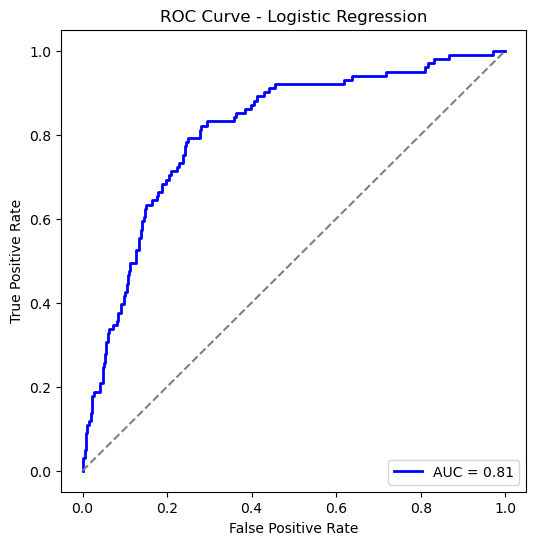

In [90]:
#the ROC-AUC curve shows how the model is good at distinguishing the churned and the unchurned
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}", linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [33]:
# Build Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)

In [36]:
# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9145427286356822

Confusion Matrix:
 [[556  10]
 [ 47  54]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.95       566
        True       0.84      0.53      0.65       101

    accuracy                           0.91       667
   macro avg       0.88      0.76      0.80       667
weighted avg       0.91      0.91      0.91       667



In [51]:
#decision tree with balancing
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight="balanced")
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8200899550224887

Confusion Matrix:
 [[462 104]
 [ 16  85]]

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.82      0.89       566
        True       0.45      0.84      0.59       101

    accuracy                           0.82       667
   macro avg       0.71      0.83      0.74       667
weighted avg       0.89      0.82      0.84       667



***Accuracy***-  how often the model is correct.

***Confusion Matrix*** -

- *Top-left*: Correctly predicted “Stayed”

- *Bottom-right*: Correctly predicted “Churned”

- *Off-diagonal*: Mistakes

***Classification Report***- shows precision, recall, and F1-score for each class.

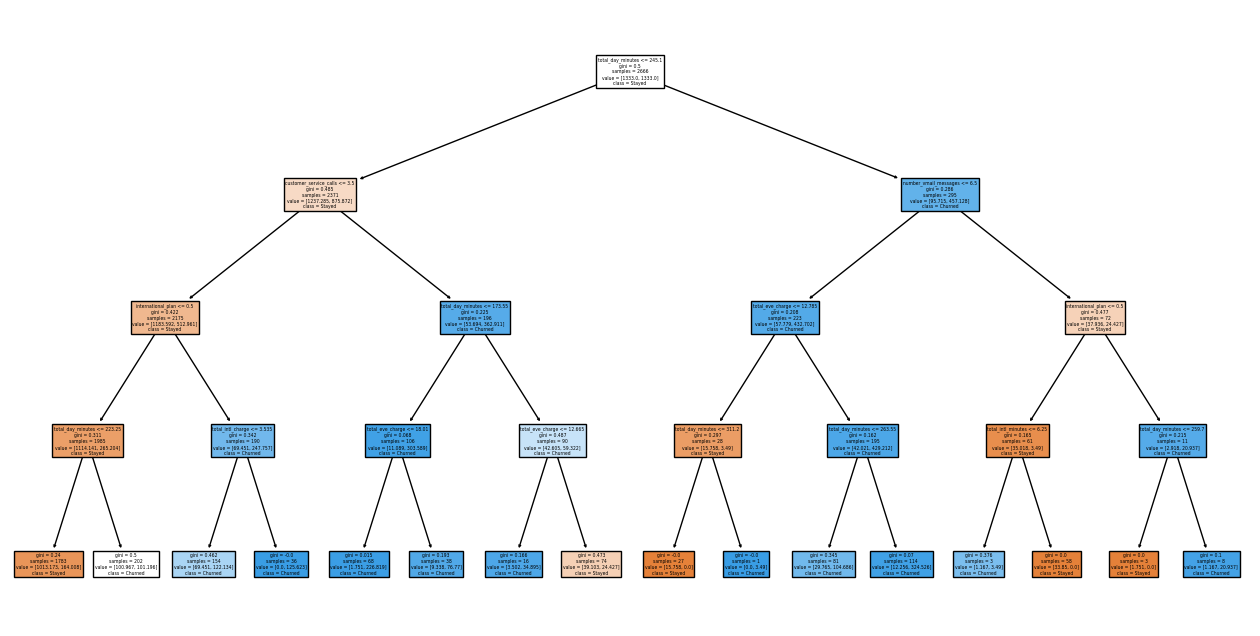

In [38]:
plt.figure(figsize=(16,8))
plot_tree(tree_model, feature_names=X.columns, class_names=["Stayed","Churned"], filled=True)
plt.show()


# Evaluation

#### comparing logistic regression and decision tree

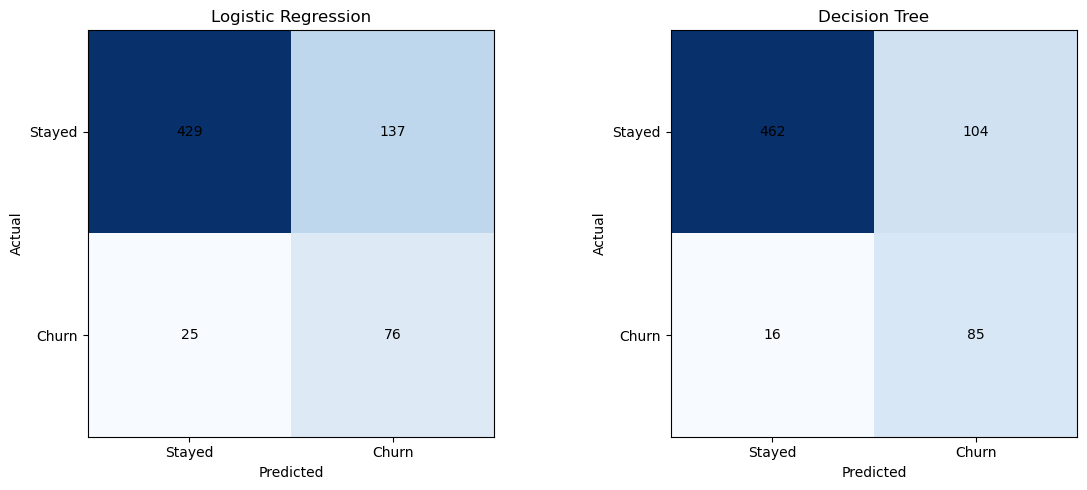

In [83]:

# Get confusion matrix 
cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix plot
11111111111w[o0-]-------------009zzzzzzzzzzzzzzzzzzzzzz`
axes[0].imshow(cm_log, cmap="Blues")
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(["Stayed", "Churn"])
axes[0].set_yticklabels(["Stayed", "Churn"])

for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm_log[i, j], ha="center", va="center", color="black")

# Decision Tree Confusion Matrix
axes[1].imshow(cm_tree, cmap="Blues")
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(["Stayed", "Churn"])
axes[1].set_yticklabels(["Stayed", "Churn"])

for i in range(2):
    for j in range(2):
        axes[1].text(j, i, cm_tree[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [81]:
#Compare model accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.7571214392803598
Decision Tree Accuracy: 0.8200899550224887



In **`logistic regression`** it predicted whether customers would stay or leave is about `85` times out of `100`

In **`decision tree`** it correctly predicted whether customers would stay or churn `91` times out of `100`

### Logistic Regresssion

- Achieved a strong performance in distinguishing churned vs. retained customers.

- The ROC curve and AUC score showed good ability to separate the two classes.

- It provides interpretable coefficients, helping us understand the impact of each feature on churn probability.

### Decision Tree 

-	Performed reasonably well but showed slightly lower predictive power compared to Logistic Regression.

-	The tree structure is highly interpretable and provides clear decision rules, making it useful for business communication.

-	However, it is more prone to overfitting and may not generalize as well as Logistic Regression.


 **`Logistic Regression`** offered better balance between accuracy, interpretability, and generalization, while the **`Decision Tree`** is useful for visualization and explaining simple patterns in churn behavior.

# Conclusion

- A significant number of customers are churning.
  
-  The visualizations show that customers with more customer service calls and certain plan features are more likely to churn, while those with fewer complaints tend to stay.
  
-   Customers who make international calls tend to remain with the company, while domestic callers are more prone to churn.
  
-    Lower customer service calls suggest higher satisfaction among some customers. Additionally, revenue per minute is a key driver of company income.

# Recommendation

- Improve customer service efficiency to reduce dissatisfaction and complaints.

- Design retention offers for domestic customers who are more likely to churn.

- Strengthen international call packages since these customers are more loyal.

- Monitor high-usage customers (revenue per minute) and reward them with loyalty incentives to maintain profitability.